In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import minimize

In [4]:
# load strategy data
daily_returns = pd.read_csv("../daily_returns.csv",index_col=0,parse_dates=True)

In [5]:
def get_weights(returns):
    vola = returns.std(axis=0)
    percent = vola / vola.sum()
    inv = 1/percent
    inv = inv / inv.sum()
    return inv

In [6]:
window = 10

max_size = daily_returns.shape[0]

alloc = pd.DataFrame([get_weights(daily_returns.iloc[i:i+window]) for i in range(0,max_size-window)])

In [9]:
alloc.index = daily_returns.index[window:]

<AxesSubplot:xlabel='Date'>

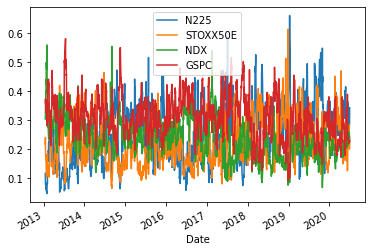

In [10]:
alloc.plot()

In [12]:
alloc.to_csv('../inverse_volatility.csv')